In [2]:
import pandas as pd
#import csv file containing data set
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
#drop date and light columns
df = df.drop(['date','lights'], axis=1)
#normalize dataframe with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#create x and y variables for linear regression model
predictor_df = scaled_df.drop(columns= 'Appliances')
target_df = scaled_df['Appliances']
#split into training and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictor_df, target_df, test_size=0.3, random_state=42)
#fit linear model and obta
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#get predicted values based on test data
predicted_values1 = linear_model.predict(x_test)


In [10]:
#function to measure linear model performance
def get_modelperformance():
    #Get MAE in two D.P
    from sklearn.metrics import mean_absolute_error
    mae1 = mean_absolute_error(y_test, predicted_values1).round(2)
    #Get RSS in two D.P
    import numpy as np
    rss1 = np.sum(np.square(y_test - predicted_values1)).round(2)
    #Get RMSE in three D.P
    from sklearn.metrics import  mean_squared_error
    rmse1 = np.sqrt(mean_squared_error(y_test, predicted_values1)).round(3)
    #Get R-squared in two D.P
    from sklearn.metrics import r2_score
    r2_score1 = r2_score(y_test, predicted_values1).round(2)
    return(mae1, r2_score1, rss1, rmse1)

In [5]:
#Return MAE, RSS, RMSE and R-squared for linear model regression
get_modelperformance()

(0.05, 0.15, 45.35, 0.088)

In [7]:
#feature weights from lowest to highest
coefficient_df = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coefficient_df)

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64


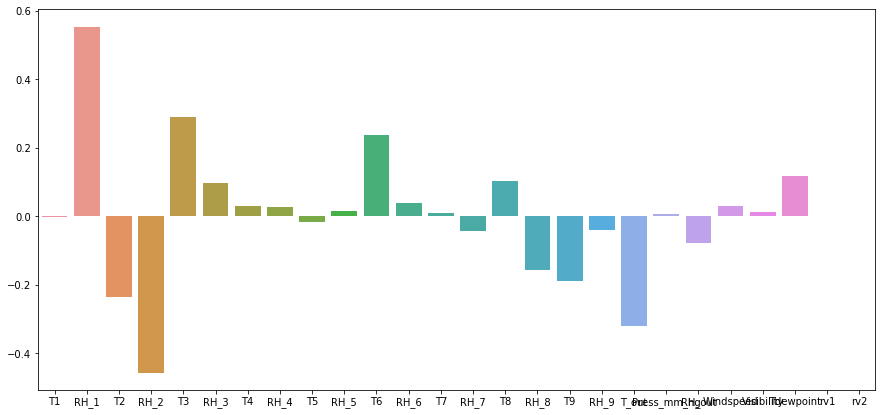

In [9]:
#visualization of feature weights from lowest to highest
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
plt.xticks(rotation=360)
sns.barplot(x = x_train.columns, y = linear_model.coef_)

In [13]:
#training a ridge regression model with alpha 0.4
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predicted_values2 = ridge_reg.predict(x_test)
#prints RMSE
import numpy as np
from sklearn.metrics import  mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_values2))
print(rmse2)
    

0.08753385704628004


In [14]:
#training a lasso regression model with alpha 0.001
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
#Get features with non-zero feature weights
lasso_weights = pd.Series(lasso_reg.coef_, x_train.columns).sort_values()
print(lasso_weights)

RH_out        -0.049557
RH_8          -0.000110
T1             0.000000
Tdewpoint      0.000000
Visibility     0.000000
Press_mm_hg   -0.000000
T_out          0.000000
RH_9          -0.000000
T9            -0.000000
T8             0.000000
RH_7          -0.000000
rv1           -0.000000
T7            -0.000000
T6             0.000000
RH_5           0.000000
T5            -0.000000
RH_4           0.000000
T4            -0.000000
RH_3           0.000000
T3             0.000000
RH_2          -0.000000
T2             0.000000
RH_6          -0.000000
rv2           -0.000000
Windspeed      0.002912
RH_1           0.017880
dtype: float64


In [15]:
#Print RMSE in three D.P with lasso regression
predicted_values3 = lasso_reg.predict(x_test)
from sklearn.metrics import  mean_squared_error
rmse3 = np.sqrt(mean_squared_error(y_test, predicted_values3)).round(3)
print(rmse3)

0.094


In [16]:
#Select X and Y variables for linear regression model 
temp_inside = predictor_df[['T2']]
temp_outside = predictor_df['T6']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_inside, temp_outside, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#Print R^2 value in two D.P
predicted_values = linear_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values).round(2)
print(r2_score)

0.64
